In [1]:
!pip install numpy
import pickle
import numpy as np
import matplotlib.pyplot as plt

You should consider upgrading via the '/home/hyruuk/anaconda3/envs/shinobi_env/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy

In [3]:
fpath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/sessionlevel_maps_corrs.pkl'
with open(fpath, 'rb') as f:
    datadict = pickle.load(f)

In [4]:
datadict

{'corr_matrix': array([[0.        , 0.17112951, 0.07736873, ..., 0.16060151, 0.0593575 ,
         0.10560142],
        [0.        , 0.        , 0.06981917, ..., 0.24076642, 0.06025802,
         0.11446434],
        [0.        , 0.        , 0.        , ..., 0.12147765, 0.04965098,
         0.05165758],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.07473273,
         0.19135476],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.03912683],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 'fnames': ['/home/hyruuk/scratch/neuromod/shinobi_data/shinobi/derivatives/fmriprep-20.2lts/fmriprep/sub-04/ses-004/func/sub-04_ses-004_task-shinobi_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/home/hyruuk/scratch/neuromod/shinobi_data/shinobi/derivatives/fmriprep-20.2lts/fmriprep/sub-04/ses-009/func/sub-04_ses-009_task-shinobi_run-1_space-MNI152NLin2009cAsym_desc-preproc_

In [5]:
condlist = np.unique(datadict['cond'])
subjlist = np.unique(datadict['subj'])
n_runs = len(datadict['fnames'])

            
    
    

In [6]:
corr_r2 = []
corr_cond = []
corr_intera = []

# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('intra-subject')

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('inter-subject')

In [7]:
import pandas as pd
plot_df = pd.DataFrame({'r2':corr_r2,
                        'event': corr_cond,
                        'comparison': corr_intera})

In [8]:
plot_df

,r2,event,comparison
0,0.283375,Hit,intra-subject
1,0.337756,Hit,intra-subject
2,0.303303,Hit,intra-subject
3,0.331466,Hit,intra-subject
4,0.329407,Hit,intra-subject
...,...,...,...
1678,0.089725,Kill,inter-subject
1679,0.103726,Kill,inter-subject
1680,0.052506,Kill,inter-subject
1681,0.066051,Kill,inter-subject


In [9]:
import seaborn as sbn
fig, ax = plt.subplots(figsize=(15,8))
sbn.boxenplot(data=plot_df, x='event', y='r2', hue='comparison', scale='area')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_xlabel('Event', fontsize=20)
ax.set_ylabel('Pearson r', fontsize=20)

Text(0, 0.5, 'Pearson r')

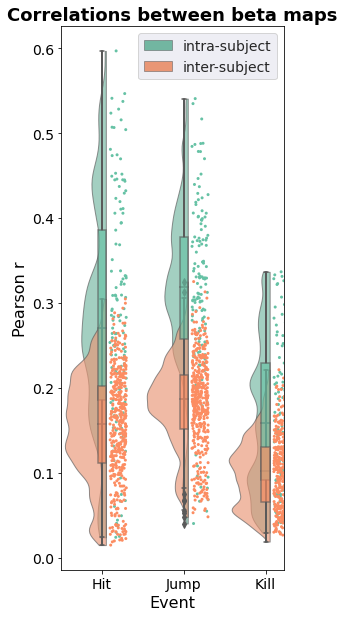

In [10]:
import ptitprince
import seaborn as sns
%matplotlib inline
dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
f, ax = plt.subplots(figsize=(4,10))
sns.set(font_scale = 2)
ax=ptitprince.RainCloud(x = dx, y = dy, hue = dhue, data = plot_df, palette = pal, bw = sigma,
width_viol = 1, ax = ax, orient = ort, alpha = .65, offset=-0.05,move=.2,  width_box=.1)
ax.set_title('Correlations between beta maps', fontsize=18, fontweight='bold')
ax.set_xlabel('Event', fontsize=16)
ax.set_ylabel('Pearson r', fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], fontsize=14)
